>**Problem Statement:** An online question and answer platform has hired you as a data scientist to identify the best question authors on the platform. This identification will bring more insight into increasing the user engagement. Given the tag of the question, number of views received, number of answers, username and reputation of the question author, the problem requires you to predict the upvote count that the question will receive.

# With log transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [2]:
df_train = pd.read_csv("train_NIR5Yl1.csv")
df_test = pd.read_csv("test_8i3B3FC.csv")

<AxesSubplot:ylabel='Density'>

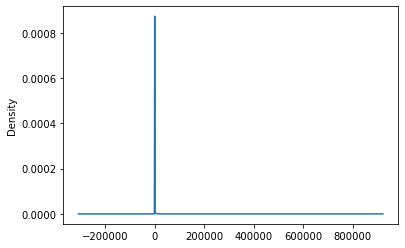

In [3]:
df_train.Upvotes.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

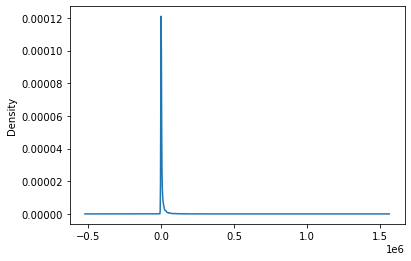

In [4]:
# independent variables
df_train.Reputation.plot(kind='kde')

In [5]:
df_train.columns

# it seems it has too many values out side the box

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

### Applying log transformation on skewed data

In [6]:
df_train.Reputation = np.log1p(df_train.Reputation)
df_test.Reputation = np.log1p(df_test.Reputation)

In [7]:
df_train.Answers = np.log1p(df_train.Answers)
df_test.Answers = np.log1p(df_test.Answers)

In [8]:
df_train.Views = np.log1p(df_train.Views)
df_test.Views = np.log1p(df_test.Views)

In [9]:
df_train.Upvotes = np.log1p(df_train.Upvotes)

In [10]:
mm = MinMaxScaler()

In [11]:
df_train.Reputation = mm.fit_transform(df_train[['Reputation']])
df_test.Reputation = mm.transform(df_test[['Reputation']])

In [12]:
df_train.Views = mm.fit_transform(df_train[['Views']])
df_test.Views = mm.transform(df_test[['Views']])

In [13]:
df_train.Answers = mm.fit_transform(df_train[['Answers']])
df_test.Answers = mm.transform(df_test[['Answers']])

### After transformation

<AxesSubplot:ylabel='Density'>

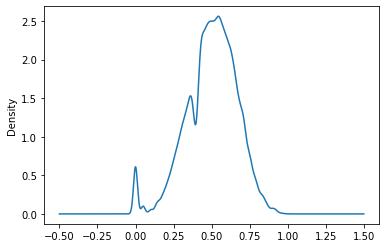

In [14]:
df_train.Reputation.plot(kind='kde')

In [15]:
df_train.drop(columns=['Username','ID'], inplace=True)
df_test.drop(columns=['Username','ID'],inplace=True)

In [16]:
df_train = pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [17]:
X = df_train.drop(columns=['Upvotes'])
y = df_train.Upvotes

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = XGBRegressor(base_score=0.6, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=np.nan, monotone_constraints='()',
             n_estimators=600, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8461868872422629

In [20]:
y_pred = model.predict(X_test)

np.sqrt(mean_squared_error(np.expm1(y_test),np.expm1(y_pred)))

1520.5029213619305

In [21]:
df_pred = model.predict(df_test)
df_pred = np.expm1(df_pred)
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('logonall_rf_results.csv',index=False)

<AxesSubplot:ylabel='Density'>

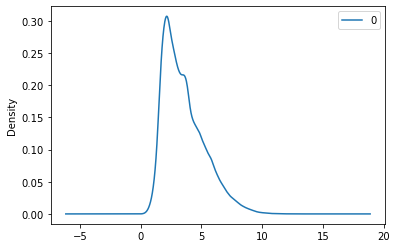

In [22]:
pd.DataFrame(model.predict(df_test)).plot(kind='kde')

In [23]:
X_train.describe()


,Reputation,Answers,Views,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
count,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000
mean,0.501157,0.325923,0.506102,0.219277,0.062412,0.097862,0.219103,0.043956,0.131971,0.037840,0.070577,0.021232
std,0.166177,0.130281,0.134944,0.413757,0.241903,0.297128,0.413639,0.204998,0.338459,0.190808,0.256118,0.144157
min,0.000000,0.000000,0.035694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.407150,0.252915,0.422068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.513849,0.319143,0.516223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.616146,0.412486,0.599739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---------------------------------
## Trying normal without log transformation

In [24]:
df_train = pd.read_csv("train_NIR5Yl1.csv")
df_test = pd.read_csv("test_8i3B3FC.csv")

In [25]:
df_train.drop(columns=['Username','ID'], inplace=True)
df_test.drop(columns=['Username','ID'],inplace=True)

In [26]:
df_train = pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [27]:
X = df_train.drop(columns=['Upvotes'])
y = df_train.Upvotes

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = XGBRegressor(base_score=0.6, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=np.nan, monotone_constraints='()',
             n_estimators=600, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9199067970099012

In [31]:
y_pred = model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

1108.7560634485196

In [32]:
df_pred = model.predict(df_test)
#df_pred = np.expm1(df_pred)
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('nothing_results.csv',index=False)

# RMSE
> ### without Log transformation - 1108.7560634485196
> ### with Log transformation - 1520.5029213619305